In [51]:
import kaggle
import pandas as pd
from shiny import App,ui
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

In [3]:
%system kaggle competitions list -s nlp 

['ref                                                               deadline             category            reward  teamCount  userHasEntered  ',
 '----------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  ',
 'https://www.kaggle.com/competitions/nlp-getting-started           2030-01-01 00:00:00  Getting Started  Knowledge       1250            True  ',
 'https://www.kaggle.com/competitions/contradictory-my-dear-watson  2030-07-01 23:59:00  Getting Started     Prizes         72           False  ']

In [4]:
%system kaggle competitions files nlp-getting-started

['name                    size  creationDate         ',
 '---------------------  -----  -------------------  ',
 'train.csv              965KB  2019-12-16 20:36:20  ',
 'sample_submission.csv   22KB  2019-12-16 20:36:20  ',
 'test.csv               411KB  2019-12-16 20:36:20  ']

In [5]:
# download relevent files, for some reason when downloading competitions through the kaggle API there isnt an --unzip option, so instead we download the individual files seperatly. 
%system kaggle competitions download nlp-getting-started  -f test.csv -p ./data
%system kaggle competitions download nlp-getting-started  -f train.csv -p ./data
%system kaggle competitions download nlp-getting-started  -f sample_submission.csv -p ./data

['sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)']

In [6]:
# read in and prepare the data

train_data = pd.read_csv(r"C:\Users\callum\OneDrive\Desktop\projects\kaggle\disaster tweets\data\train.csv")
test_data = pd.read_csv(r"C:\Users\callum\OneDrive\Desktop\projects\kaggle\disaster tweets\data\test.csv")

In [7]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# quick look at the columns, are keyword and locationa always NaN?

list(train_data.keyword.unique())

[nan,
 'ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate'

In [9]:
list(train_data.location.unique())

[nan,
 'Birmingham',
 'Est. September 2012 - Bristol',
 'AFRICA',
 'Philadelphia, PA',
 'London, UK',
 'Pretoria',
 'World Wide!!',
 'Paranaque City',
 'Live On Webcam',
 'milky way',
 'GREENSBORO,NORTH CAROLINA',
 'England.',
 'Sheffield Township, Ohio',
 'India',
 'Barbados',
 'Anaheim',
 'Abuja',
 'USA',
 'South Africa',
 'Sao Paulo, Brazil',
 'hollywoodland ',
 'Edmonton, Alberta - Treaty 6',
 'Inang Pamantasan',
 'Twitter Lockout in progress',
 'Concord, CA',
 'Calgary, AB',
 'San Francisco',
 'CLVLND',
 'Nashville, TN',
 'Santa Clara, CA',
 'UK',
 'St. Louis, MO',
 'Walker County, Alabama',
 'Australia',
 'North Carolina',
 'Norf Carolina',
 'San Mateo County, CA',
 'Njoro, Kenya',
 "Your Sister's Bedroom",
 'Arlington, TX',
 'South Bloomfield, OH',
 'New Hanover County, NC',
 'Maldives',
 'Manchester, NH',
 'Wilmington, NC',
 'global',
 'Alberta | Sask. | Montana',
 'Charlotte',
 'Baton Rouge, LA',
 'Hagerstown, MD',
 'Gloucestershire , UK',
 'Nairobi, Kenya',
 'Instagram - @hey

In [10]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [21]:
[str(col) for col in train_data.columns]

['id', 'keyword', 'location', 'text', 'target']

In [22]:
[str(dtype) for dtype in set(train_data.dtypes)]

['object', 'int64']

In [25]:
str(train_data["id"].dtype)

'int64'

In [31]:
train_data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [32]:
col = train_data["id"]

In [52]:
is_numeric_dtype(col)

True

Text(0.5, 1.0, 'Histogram of feature: 0           1\n1           4\n2           5\n3           6\n4           7\n        ...  \n7608    10869\n7609    10870\n7610    10871\n7611    10872\n7612    10873\nName: id, Length: 7613, dtype: int64')

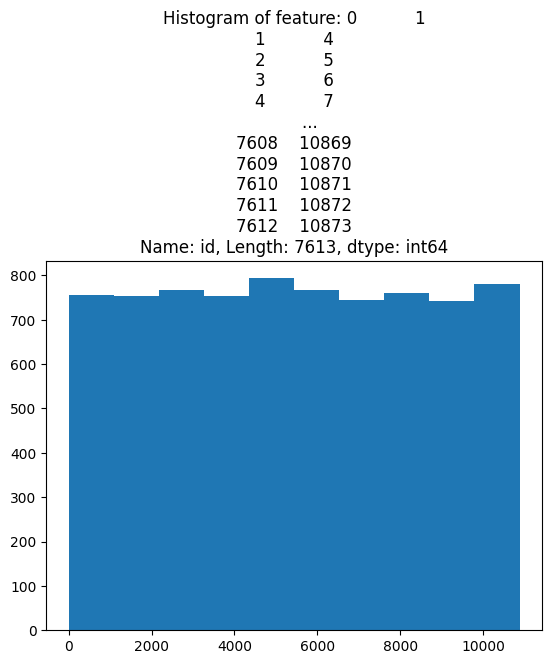

In [43]:
fix, ax = plt.subplots()

ax.hist(col,cumulative=False)
ax.set_title(f"Histogram of feature: {col}")

In [71]:
len(train_data["keyword"].unique())

222

<Axes: xlabel='keyword'>

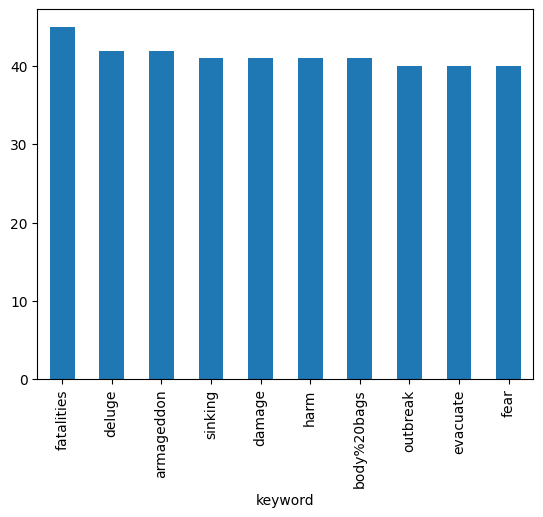

In [70]:
train_data["keyword"].value_counts()[0:10].plot(kind="bar")

In [79]:
col = train_data["keyword"]

<Axes: title={'center': 'rewrwe'}, xlabel='keyword'>

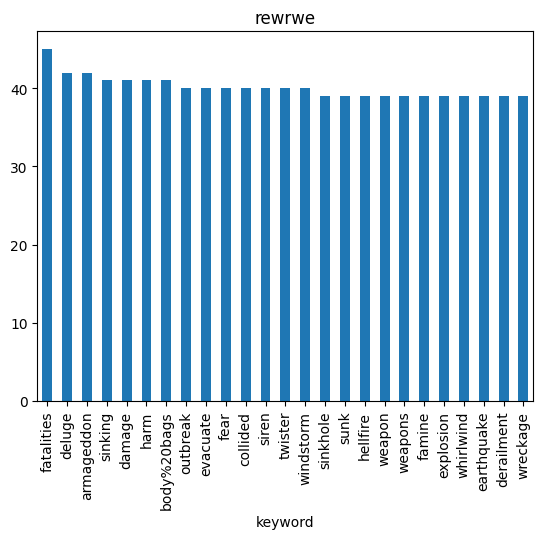

In [86]:
fig, ax = plt.subplots()
col.value_counts()[0:25].plot(kind="bar",title="rewrwe")
#ax.set_title(f"A frequency plot for the: variable")

In [90]:
len(train_data["location"].value_counts())

3341